**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are a couple of small problems that need to be fixed before the project is accepted. Let me know if you have questions!

#### importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## opening datasets and seeing what is inside

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full.csv')

#### train_df 

In [3]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
train_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


#### test_df

In [6]:
test_df.head() 

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
test_df.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

#### seeing if the recovery was calculated correctly using the training set

In [9]:
def calculate_recovery(c, f, t):
    return 100 * (c * (f - t)) / (f * (c - t))

train = train_df.copy()
calculated_recovery = calculate_recovery(
    train["rougher.output.concentrate_au"], 
    train["rougher.input.feed_au"], 
    train["rougher.output.tail_au"]
)

actual_recovery = train["rougher.output.recovery"]

mae = np.mean(np.abs(calculated_recovery - actual_recovery))

mae

1.0724115653039479e-14

<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully

</div>

#### seeing what features are not available in the test set

In [10]:
features_train = set(train_df.columns)
features_test = set(test_df.columns)
missing_features = features_train - features_test

missing_features

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

#### the features that are missing from the test dataset are outputs for different stages in the different metal types and other calculations which are not necessary for model testing

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right, the important point here is that none of these columns can be used as features in the models as we want to avoid data leakage.

</div>

#### seeing how much data is missing from the datasets

In [11]:
def missing_data_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_train = missing_data_percentage(train_df)
missing_test = missing_data_percentage(test_df)

missing_train.head(10), missing_test.head(10)

(                                    Total    Percent
 rougher.output.recovery              2573  15.260973
 rougher.output.tail_ag               2250  13.345196
 rougher.output.tail_sol              2249  13.339265
 rougher.output.tail_au               2249  13.339265
 secondary_cleaner.output.tail_sol    1986  11.779359
 rougher.input.floatbank11_xanthate   1904  11.293001
 final.output.recovery                1521   9.021352
 primary_cleaner.input.sulfate        1307   7.752076
 primary_cleaner.input.depressant     1262   7.485172
 rougher.calculation.au_pb_ratio      1242   7.366548,
                                           Total   Percent
 rougher.input.floatbank11_xanthate          353  6.028005
 primary_cleaner.input.sulfate               302  5.157104
 primary_cleaner.input.depressant            284  4.849727
 rougher.input.floatbank10_sulfate           257  4.388661
 primary_cleaner.input.xanthate              166  2.834699
 rougher.input.floatbank10_xanthate          123  2

#### forward filling the missing values because there is a large percentage of data missing that we do not want to lose out on

In [12]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
full_df['date'] = pd.to_datetime(full_df['date'])

targets = ['rougher.output.recovery', 'final.output.recovery']
if set(targets).issubset(train_df.columns):
    train_df = train_df.dropna(subset=targets)
if set(targets).issubset(test_df.columns):
    test_df = test_df.dropna(subset=targets)
if set(targets).issubset(full_df.columns):
    full_df = full_df.dropna(subset=targets)

train_df = train_df.fillna(method='ffill')
test_df = test_df.fillna(method='ffill')
full_df = full_df.fillna(method='ffill')

missing_train_filled = missing_data_percentage(train_df)
missing_test_filled = missing_data_percentage(test_df)
missing_full_filled = missing_data_percentage(full_df)

missing_train_filled.head(), missing_test_filled.head(), missing_full_filled.head()

(                                   Total  Percent
 date                                   0      0.0
 rougher.state.floatbank10_b_air        0      0.0
 rougher.state.floatbank10_f_air        0      0.0
 rougher.state.floatbank10_e_level      0      0.0
 rougher.state.floatbank10_e_air        0      0.0,
                                    Total  Percent
 date                                   0      0.0
 rougher.state.floatbank10_c_air        0      0.0
 rougher.state.floatbank10_d_air        0      0.0
 rougher.state.floatbank10_d_level      0      0.0
 rougher.state.floatbank10_e_air        0      0.0,
                                    Total  Percent
 date                                   0      0.0
 rougher.state.floatbank10_b_air        0      0.0
 rougher.state.floatbank10_f_air        0      0.0
 rougher.state.floatbank10_e_level      0      0.0
 rougher.state.floatbank10_e_air        0      0.0)

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Forward fill is appropriate in this case, but we need to make sure to drop missing targets before applying it, otherwise we won't be able to accurately estimate model error.

</div>

<div class="alert alert-info">
dropped targets before applying ffill
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

## data analysis

#### seeing how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

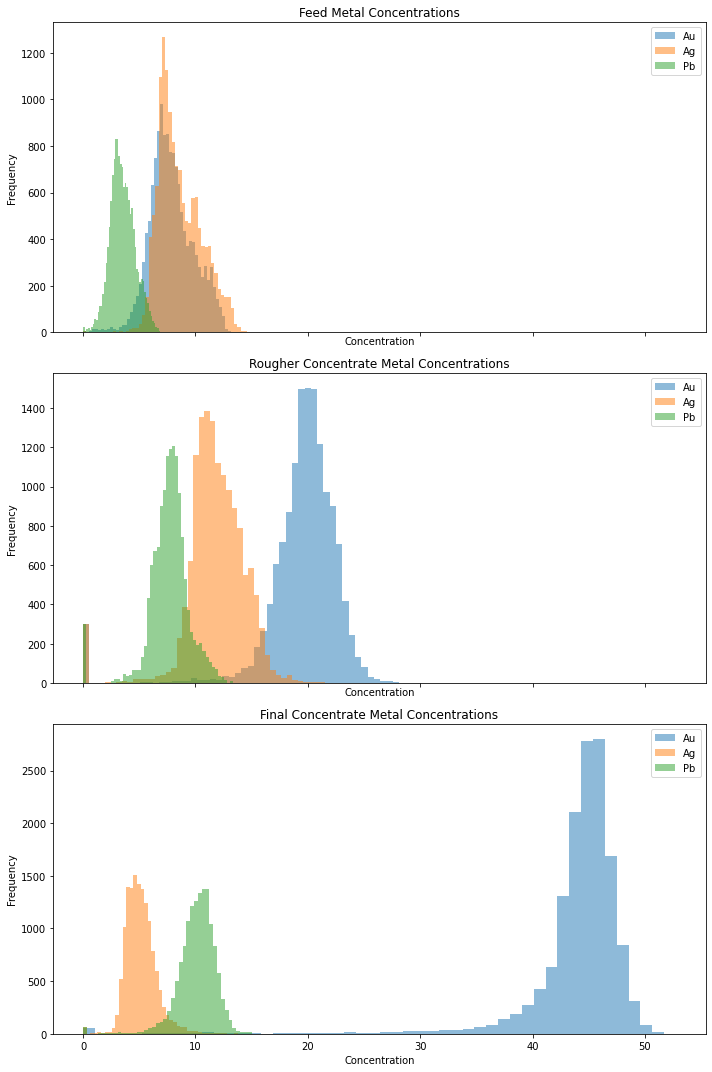

In [13]:
concentration_stages = {
    'Feed': {
        'Au': train_df['rougher.input.feed_au'],
        'Ag': train_df['rougher.input.feed_ag'],
        'Pb': train_df['rougher.input.feed_pb']
    },
    'Rougher Concentrate': {
        'Au': train_df['rougher.output.concentrate_au'],
        'Ag': train_df['rougher.output.concentrate_ag'],
        'Pb': train_df['rougher.output.concentrate_pb']
    },
    'Final Concentrate': {
        'Au': train_df['final.output.concentrate_au'],
        'Ag': train_df['final.output.concentrate_ag'],
        'Pb': train_df['final.output.concentrate_pb']
    }
}

fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for idx, (metal, data) in enumerate(concentration_stages.items()):
    ax[idx].hist(data['Au'], bins=50, alpha=0.5, label='Au')
    ax[idx].hist(data['Ag'], bins=50, alpha=0.5, label='Ag')
    ax[idx].hist(data['Pb'], bins=50, alpha=0.5, label='Pb')
    ax[idx].set_title(f'{metal} Metal Concentrations')
    ax[idx].legend()
    ax[idx].set_xlabel('Concentration')
    ax[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
mean_concentrations = pd.DataFrame({
    'Stage': ['Feed', 'Rougher Concentrate', 'Final Concentrate'],
    'Mean Au': [
        concentration_stages['Feed']['Au'].mean(),
        concentration_stages['Rougher Concentrate']['Au'].mean(),
        concentration_stages['Final Concentrate']['Au'].mean()
    ],
    'Mean Ag': [
        concentration_stages['Feed']['Ag'].mean(),
        concentration_stages['Rougher Concentrate']['Ag'].mean(),
        concentration_stages['Final Concentrate']['Ag'].mean()
    ],
    'Mean Pb': [
        concentration_stages['Feed']['Pb'].mean(),
        concentration_stages['Rougher Concentrate']['Pb'].mean(),
        concentration_stages['Final Concentrate']['Pb'].mean()
    ]
})

mean_concentrations

,Stage,Mean Au,Mean Ag,Mean Pb
0,Feed,7.866577,8.579195,3.505465
1,Rougher Concentrate,19.439958,11.775812,7.664555
2,Final Concentrate,44.003792,5.141921,10.132848


#### Feed: The initial concentrations are relatively low for all three metals, as expected before any processing. Rougher Concentrate: After the rougher flotation process, there is an increase in the concentration of all metals, especially for Gold, which shows a significant peak in its distribution. Final Concentrate: The concentration of all metals is higher than in previous stages (except for Ag). Gold shows a particularly high concentration, which is the primary target in gold mining operations. Silver and Lead also exhibit higher concentrations but to a lesser extent compared to Gold. These observations suggest that the purification process is effective in increasing the metal concentrations from the feed to the final product, with Gold showing the most substantial enrichment. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Makes sense!

</div>

#### comparing the feed particle size distributions in the training set and in the test set

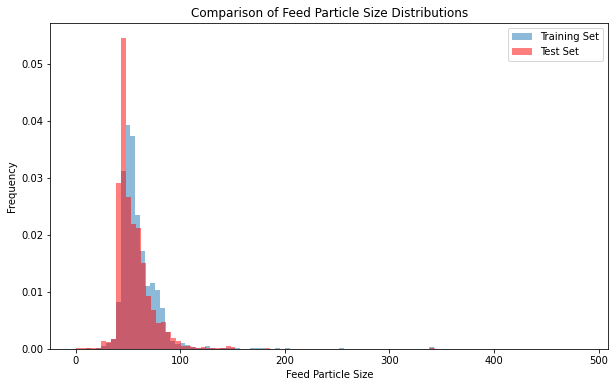

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(train_df['rougher.input.feed_size'], bins=100, alpha=0.5, label='Training Set', density=True)
ax.hist(test_df['rougher.input.feed_size'], bins=100, alpha=0.5, label='Test Set', color='red', density=True)
ax.set_title('Comparison of Feed Particle Size Distributions')
ax.set_xlabel('Feed Particle Size')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

#### There is overlap in the distributions suggesting that the particle size characteristics are generally consistent between the two datasets. Range and Peaks: Both distributions exhibit similar ranges and peak particle sizes

<div class="alert alert-warning">
<b>Reviewer's comment</b>

One small note: when comparing distributions of samples of different size it's a good idea to normalize the histograms (e.g. using `density=True` parameter of `hist()`)

</div>

<div class="alert alert-info">
used density=True
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright!

</div>

#### looking at the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate.

In [16]:
feed = full_df['rougher.input.feed_au'] + full_df['rougher.input.feed_ag'] + full_df['rougher.input.feed_pb']
rougher_concentrate = full_df['rougher.output.concentrate_au'] + full_df['rougher.output.concentrate_ag'] + full_df['rougher.output.concentrate_pb']
final_concentrate = full_df['final.output.concentrate_au'] + full_df['final.output.concentrate_ag'] + full_df['final.output.concentrate_pb']

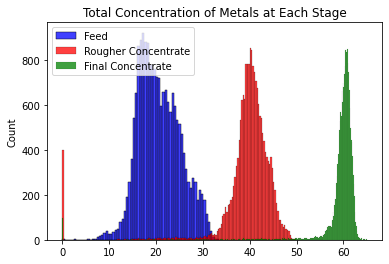

In [17]:
sns.histplot(data=feed, color = 'blue', legend = True, label = 'Feed')
sns.histplot(data=rougher_concentrate, color = 'red', legend = True, label = 'Rougher Concentrate')
sns.histplot(data=final_concentrate, color = 'green', legend = True, label = 'Final Concentrate')
plt.legend()
plt.title('Total Concentration of Metals at Each Stage')
plt.show()

#### Feed: The total concentration at this stage shows a broad distribution, which is expected given the varied nature of the raw materials entering the process. Rougher Concentrate: The concentration here is generally higher than in the feed, indicating successful enrichment of valuable metals. Final Concentrate: This stage shows the highest concentration levels, as expected for a finished product. There are also some very low values similar to those seen in the rougher stage. Anomalies: The very low total concentrations in the rougher and final concentrates are concerning because they could represent errors or non-standard operating conditions that should not influence the predictive model. I will be removing these

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good point!

</div>

In [18]:
total_concentration_feed = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]

total_concentration_rougher = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

total_concentration_final = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]

#### taking > 20 

In [19]:
train_df.set_index('date', inplace=True)

In [20]:
threshold = 20 
train_df_2 = train_df[train_df[total_concentration_feed].sum(1) > threshold].reset_index()
train_df_2 = train_df[train_df[total_concentration_rougher].sum(1) > threshold].reset_index()
train_df_2 = train_df[train_df[total_concentration_final].sum(1) > threshold].reset_index()


In [21]:
train_df_2.shape

(14051, 87)

In [22]:
original_size = train_df.shape[0]
filtered_size = train_df_2.shape[0]
filtered_percentage = (filtered_size / original_size) * 100

original_size, filtered_size, filtered_percentage

(14149, 14051, 99.30737154569228)

In [23]:
test_df.set_index('date', inplace=True)

full_df.set_index('date', inplace=True)

In [24]:
full_df.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [25]:
test_df.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [26]:
full_df_test = full_df.reindex(test_df.index)
test_df = test_df[full_df_test[total_concentration_feed].sum(1) > threshold]
test_df = test_df[full_df_test[total_concentration_rougher].sum(1) > threshold]
test_df = test_df[full_df_test[total_concentration_final].sum(1) > threshold]

/tmp/ipykernel_307/3836371685.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = test_df[full_df_test[total_concentration_rougher].sum(1) > threshold]
/tmp/ipykernel_307/3836371685.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = test_df[full_df_test[total_concentration_final].sum(1) > threshold]


<div class="alert alert-danger">
<S><b>Reviewer's comment</b>

You can't use `test_df.index` to filter `full_df` unless you set the date column as index in both dataframes

</div>

<div class="alert alert-info">
set the index to date
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good!

</div>

In [27]:
original_size_t = full_df_test.shape[0]
filtered_size_t = test_df.shape[0]
filtered_percentage_t = (filtered_size_t / original_size_t) * 100

original_size_t, filtered_size_t, filtered_percentage_t

(5856, 5143, 87.82445355191257)

In [28]:
test_df.shape

(5143, 52)

In [29]:
final_train = train_df_2[test_df.columns]
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14051 entries, 0 to 14050
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14051 non-null  float64
 1   primary_cleaner.input.depressant            14051 non-null  float64
 2   primary_cleaner.input.feed_size             14051 non-null  float64
 3   primary_cleaner.input.xanthate              14051 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14051 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14051 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14051 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14051 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14051 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    14051 non-null  float64
 10  primary_cl

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5143 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5143 non-null   float64
 1   primary_cleaner.input.depressant            5143 non-null   float64
 2   primary_cleaner.input.feed_size             5143 non-null   float64
 3   primary_cleaner.input.xanthate              5143 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5143 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5143 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5143 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5143 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5143 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5143 

#### after removing anything lower than a total concentration of 20 I am left with 99% left of the data in the training set and 88% in the test set
#### removing the date column to build the model

In [31]:
final_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


#### making features train, target train, features test, and target test

In [32]:
train_df_2.set_index('date', inplace=True)

In [33]:
train_df_2.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [34]:
features_train = final_train
target_train = train_df_2[['rougher.output.recovery', 'final.output.recovery']]

features_test = test_df
target_test = full_df[['rougher.output.recovery', 'final.output.recovery']].loc[test_df.index].reset_index(drop=True)

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Same problem here as above: you need to use the dates to find test set targets from the full dataset

</div>

<div class="alert alert-info">
set the index to date
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

In [35]:
target_test.shape, features_test.shape, features_train.shape, target_train.shape

((5143, 2), (5143, 52), (14051, 52), (14051, 2))

## Building the model

#### writing a function to calculate the final sMAPE value.

In [36]:
def smape(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100 
    return smape

def fsmape(y_true, y_pred):
    
    y_true = y_true.values if not isinstance(y_true, np.ndarray) else y_true
    y_pred = y_pred.values if not isinstance(y_pred, np.ndarray) else y_pred
    
    epsilon = np.finfo(float).eps  
    summ = np.abs(y_true) + np.abs(y_pred)
    summ[summ == 0] = epsilon  
    
    smape = 2 * np.abs(y_pred - y_true) / summ
    return 100/len(y_true) * np.sum(smape)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The functions for SMAPE calculation are correct

</div>

#### checking the final smape score on training and test sets

In [37]:
pred_median = target_train.copy()
pred_median['rougher.output.recovery'] = target_train['rougher.output.recovery'].median()
pred_median['final.output.recovery'] = target_train['final.output.recovery'].median()
print('Weighted sMAPE on Target Train:')
print(fsmape(target_train.values, pred_median.values))

pred_median = target_test.copy()
pred_median['rougher.output.recovery'] = target_train['rougher.output.recovery'].median()
pred_median['final.output.recovery'] = target_train['final.output.recovery'].median()
print('Weighted sMAPE on Target Test:')
print(fsmape(target_test.values, pred_median.values))

Weighted sMAPE on Target Train:
21.447677588779
Weighted sMAPE on Target Test:
12.963140755744298


<div class="alert alert-success">
<b>Reviewer's comment</b>

Good simple baseline!

</div>

In [38]:
def score_model(model, features_train, target_train, cv=4):
    scores = []
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):
        
        features_subtrain = features_train.iloc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.iloc[subtrain_index].reset_index(drop=True)
        features_valid = features_train.iloc[valid_index].reset_index(drop=True)
        target_valid = target_train.iloc[valid_index].reset_index(drop=True)
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))
        
        scores.append(fsmape(target_valid, pred_valid))
        
    return pd.Series(scores).mean()

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The function for cross-validation is correct and it uses our custom target metric, but it should really take `features_train` and `target_train` as an argument, not use a global variable
    

</div>

<div class="alert alert-info">
used features_train and target_train
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Awesome!

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

There's no need to do this: you can convert `y_true` into a numpy array for the code to work correctly at the beginning of `fsmape` like this: `y_true = y_true.values`

</div>

<div class="alert alert-info">
I think I fixed it
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yep!

</div>

In [42]:
model = LinearRegression()
lr_score = score_model(model, features_train, target_train)
print("LR:", lr_score)

LR: 24.614783810473927


In [40]:
for depth in range(1, 5):
    model = RandomForestRegressor(max_depth=depth, n_estimators=50, random_state=12345)
    score = score_model(model, features_train, target_train)
    print("RF, depth =", depth, "score =", score)

RF, depth = 1 score = 24.27433831152105
RF, depth = 2 score = 23.220583739845857
RF, depth = 3 score = 22.95950206868006
RF, depth = 4 score = 22.091910048987444


In [43]:
for depth in range(1, 11):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    score = score_model(model, features_train, target_train)
    print("DT, depth =", depth, "score =", score)

DT, depth = 1 score = 24.536834170755842
DT, depth = 2 score = 23.454649301960668
DT, depth = 3 score = 23.528067312476182
DT, depth = 4 score = 22.295207623869317
DT, depth = 5 score = 21.93936739700252
DT, depth = 6 score = 22.5262460888135
DT, depth = 7 score = 24.832253287365557
DT, depth = 8 score = 24.507252001517827
DT, depth = 9 score = 28.128120746259064
DT, depth = 10 score = 29.753746692735128


#### the DTR model with a depth of 5 scored the highest. this is what my final model will be built on

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you use cross-validation to tune the models' hyperparameters

</div>

In [47]:
final_model = DecisionTreeRegressor(max_depth=5, random_state=12345)
score = score_model(final_model, features_test, target_test)
score

16.46176349556019

#### final model got a score of being wrong 16.5% of the time

## Conclusion
#### in conclusion, the datasets have been downloaded, cleaned, analyzed, with a final model with a fsmape score of 16.5%. to help achieve this score I removed concentrations below 20, trained several models on different hyperparameters, ffilled missing values. this model being right 83.5% of the time may or may not be acceptable to this company, I will have to present my findings to them to let them make the final decision.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Yep, don't forget to evaluate the best model on the test set and make a final conclusion

</div>

<div class="alert alert-info">
added a conclusion and best model
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Excellent! Now, it's not true that the model is wrong 16.5% of the time though, that is not quite what SMAPE measures. It means the predicted value is about 16.5% off from the target on average.
    
Looking back at our baseline we find that the constant model always predicting median of train set targets has a lower error (12.9%). So unfortunately, our model is less useful than the simple constant baseline. There can be several reasons for this: for example, maybe data quality is poor, or maybe we don't have access to some variable which actually determines the outcome.

Thanks for taking the time to improve the project! It is now accepted. Good luck on the next sprint!
    
</div>